# <center> Definition of edible mushrooms</center>
#  <center>With help of neural networks</center>

In [332]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s1.1zoom.ru/b5050/335/Mushrooms_nature_Closeup_503640_2560x1600.jpg", width=500, height=500)

In [333]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [334]:
data = pd.read_csv("mushrooms.csv")
data.shape
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [335]:
data.shape

(8124, 23)

#### About the data
Here's some of the columns
* class: edible=e, poisonous=p
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a, descending=d, free=f, notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y


In [336]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [337]:
data.groupby('class').size() 

class
e    4208
p    3916
dtype: int64

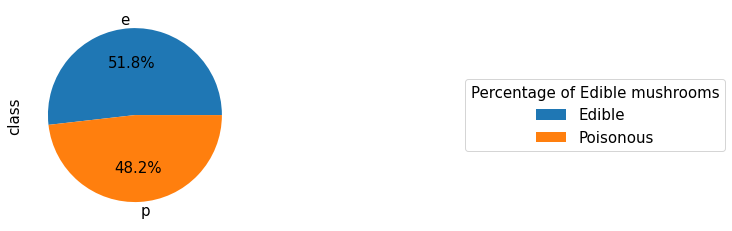

In [338]:
(data['class'].value_counts(normalize=True) * 100).plot.pie(autopct='%1.1f%%').legend(labels=["Edible", "Poisonous"], loc='center right', bbox_to_anchor=(3.25, 0.5)).set_title("Percentage of Edible mushrooms")


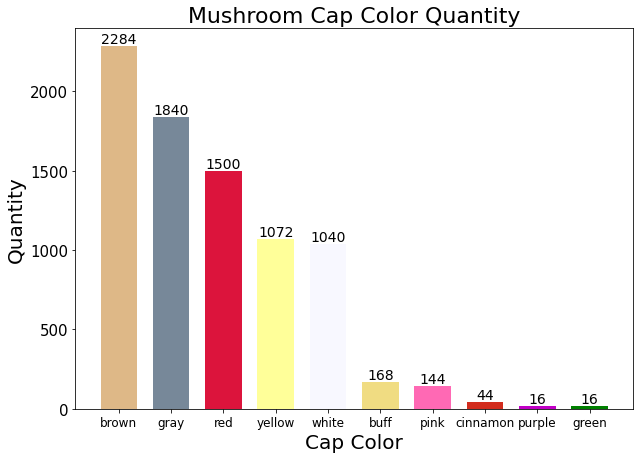

In [339]:
cap_colors = data['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars.


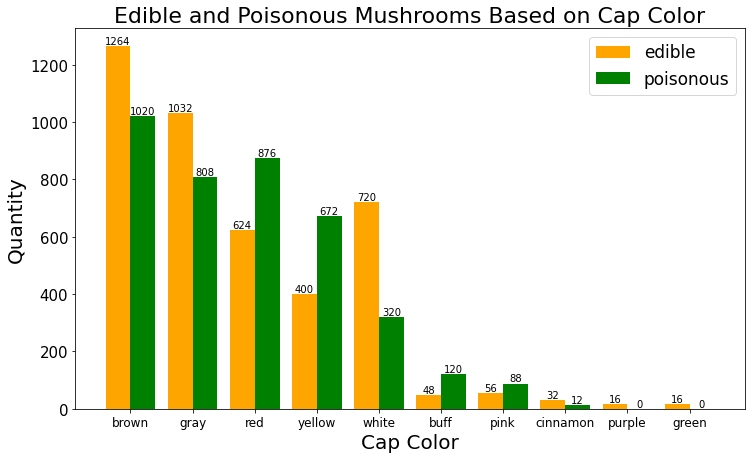

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [340]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(data[data['cap-color'] == capColor].index)
    edibles = len(data[(data['cap-color'] == capColor) & (data['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='orange')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='green')
#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

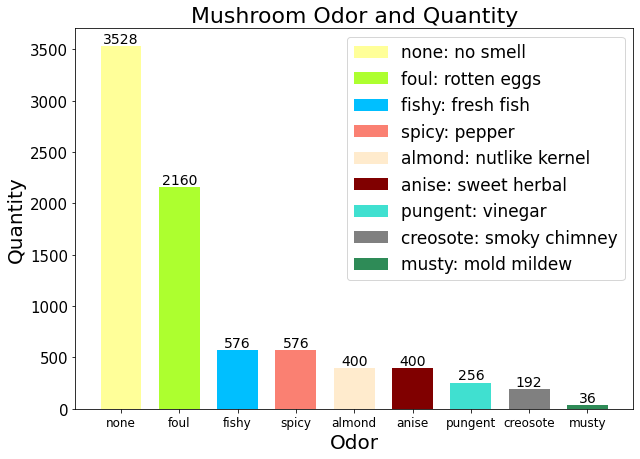

In [341]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = data['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)
#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display bars. 

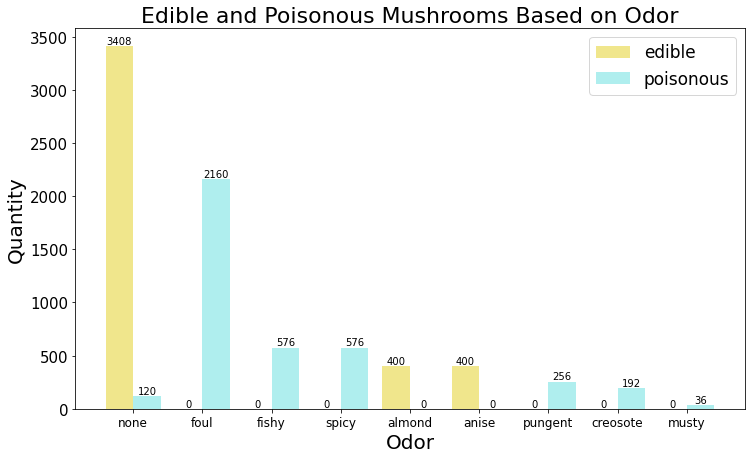

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [342]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(data[data['odor'] == odor].index)
    edibles = len(data[(data['odor'] == odor) & (data['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#F0E68C')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#AFEEEE')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

f    4748
t    3376
Name: bruises, dtype: int64


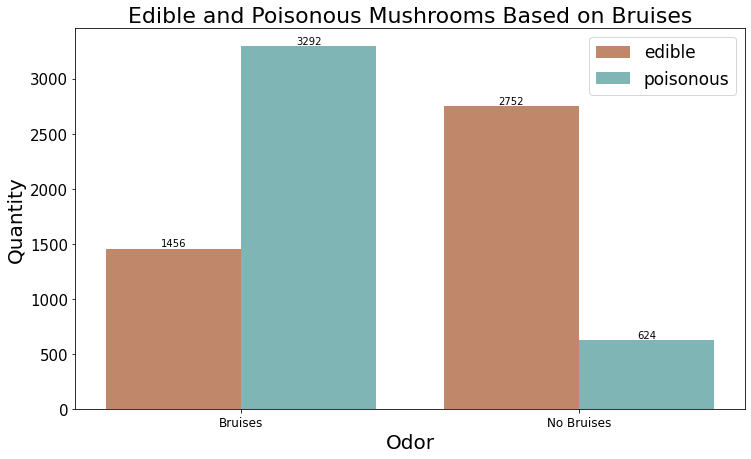

[1456, 2752]
[3292, 624]


In [343]:
bruises = data['bruises'].value_counts()
bruises_height = bruises.values.tolist()
bruises_labels = bruises.axes[0].tolist()
ind = np.arange(2)
print(bruises)

poisonous_br = [] #Poisonous odor list
edible_br = []    #Edible odor list
for bruis in bruises_labels:
    size = len(data[data['bruises'] == bruis].index)
    edibles = len(data[(data['bruises'] == bruis) & (data['class'] == 'e')].index)
    edible_br.append(edibles)
    poisonous_br.append(size-edibles)

                        
#=====PLOT Preparations and Plotting====#

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_br , width, color='#c1876b')
poison_bars = ax.bar(ind + width, poisonous_br , width, color='#7fb5b5')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Bruises',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Bruises', 'No Bruises'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_br)
print(poisonous_br)




            

In [344]:
data.groupby('bruises').size() 

bruises
f    4748
t    3376
dtype: int64

[4040, 1712, 1248, 400, 384, 340]


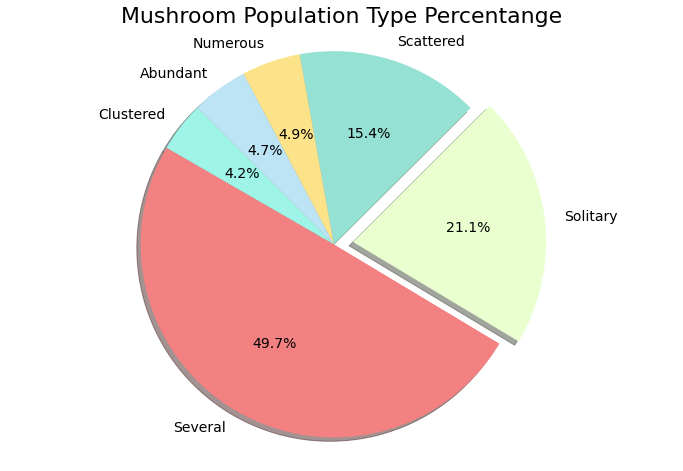

In [345]:
populations = data['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
plt.axis('equal')
plt.show()

In [346]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [347]:
mapping=[{'e':1,'p':0},
         {'b':0,'c':1,'x':2,'f':3, 'k':4,'s':5},
         {'f':0,'g':1,'y':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9},
         {'t':1,'f':0},
         {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8},
         {'a':0,'d':1, 'f':2, 'n':3},
         {'c':0,'w':1,'d':2},
         {'b':0,'n':1},
         {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
         { 'e':0,'t':1},
         {'b':0,'c':1,'u':2,'e':3,'z':4,'r':5,'?':6},
         {'f':0,'y':1,'k':2,'s':3},
         {'f':0,'y':1,'k':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':5,'w':6,'y':7},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8},
         {'p':0,'u':1},
         {'n':0,'o':1,'w':2,'y':3},
         {'n':0,'o':1,'t':2},
         {'c':4,'e':1,'f':2,'l':3,'n':0,'p':5,'s':6,'z':7},
         {'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8},
         {'a':0,'c':1,'n':2,'s':3,'v':4,'y':5},
         {'g':0,'l':1,'m':2,'p':3,'u':4,'w':5,'d':6}]
len(mapping),len(data.columns)

(23, 23)

In [348]:
for i in range(len(data.columns)):
    data[data.columns[i]]=data[data.columns[i]].map(mapping[i]).astype(int)

In [349]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,1,7,2,0,1,0,...,3,6,7,0,2,1,5,0,3,4
1,1,2,3,9,1,1,2,0,0,0,...,3,6,7,0,2,1,5,1,2,0
2,1,0,3,8,1,2,2,0,0,1,...,3,6,7,0,2,1,5,1,2,2
3,0,2,2,8,1,7,2,0,1,1,...,3,6,7,0,2,1,5,0,3,4
4,1,2,3,3,0,0,2,1,0,0,...,3,6,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,3,0,0,0,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,1,2,3,0,0,0,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,1,3,3,0,0,0,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,0,4,2,0,0,4,2,0,1,2,...,2,6,7,0,2,1,1,7,4,1


In [350]:
data.shape

(8124, 23)

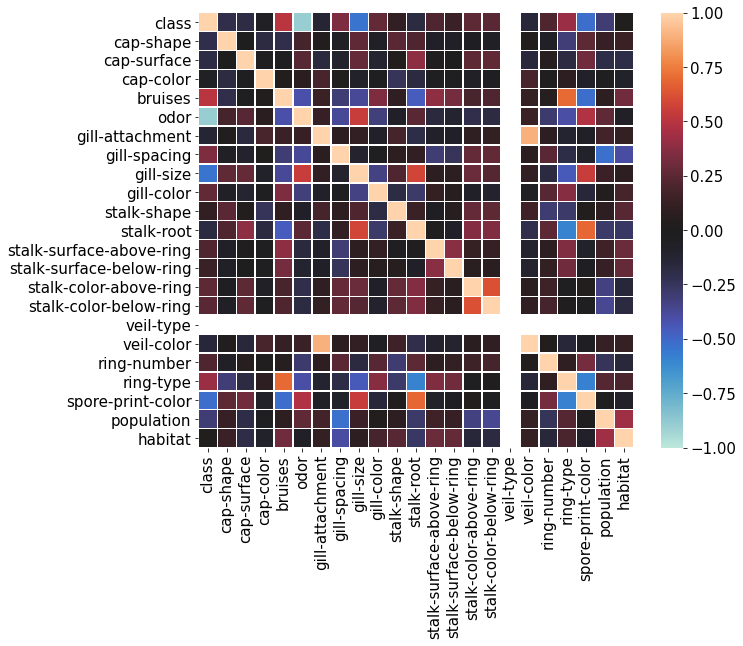

In [351]:

fig, ax = plt.subplots(figsize=(10, 8))
data_correl = data[list(data)].corr()
sns.heatmap(data_correl, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5)
plt.savefig('corr_mush.png')

In [352]:
data[list(data)].corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.199488,-0.186806,-0.058452,0.501530,-0.894787,-0.129200,0.348387,-0.540024,0.270247,...,0.139254,0.253251,0.245231,NaN,-0.145142,0.214366,0.419044,-0.519438,-0.298686,0.022363
cap-shape,-0.199488,1.000000,-0.007059,-0.176574,-0.199703,0.186701,0.032099,-0.061368,0.259001,-0.069180,...,-0.068732,-0.039429,-0.067470,NaN,0.036995,-0.069245,-0.308069,0.251207,0.129000,0.134210
cap-surface,-0.186806,-0.007059,1.000000,-0.022923,-0.019547,0.240408,-0.161757,-0.096076,0.274933,-0.122924,...,-0.000094,0.251011,0.260090,NaN,-0.154804,0.060429,-0.172302,0.310188,-0.188979,-0.191609
cap-color,-0.058452,-0.176574,-0.022923,1.000000,0.034513,0.077232,0.192322,0.023269,-0.091914,-0.020306,...,-0.026967,-0.066643,-0.025502,NaN,0.188903,0.010226,0.091632,-0.079787,-0.017712,-0.089724
bruises,0.501530,-0.199703,-0.019547,0.034513,1.000000,-0.411035,0.137359,-0.299473,-0.369596,0.348658,...,0.323013,0.193354,0.213054,NaN,0.119770,0.056788,0.696406,-0.519982,0.088137,0.305354
odor,-0.894787,0.186701,0.240408,0.077232,-0.411035,1.000000,0.126963,-0.371744,0.550909,-0.317207,...,-0.112837,-0.196218,-0.179177,NaN,0.137413,-0.283660,-0.399696,0.481270,0.258395,-0.069010
gill-attachment,-0.129200,0.032099,-0.161757,0.192322,0.137359,0.126963,1.000000,0.071489,0.108984,-0.080726,...,-0.075554,0.097414,0.116158,NaN,0.897518,0.093236,-0.116477,-0.068909,0.165575,0.115387
gill-spacing,0.348387,-0.061368,-0.096076,0.023269,-0.299473,-0.371744,0.071489,1.000000,-0.108333,-0.037735,...,-0.241945,0.278873,0.271301,NaN,0.073363,0.243014,-0.190251,-0.092992,-0.529253,-0.397884
gill-size,-0.540024,0.259001,0.274933,-0.091914,-0.369596,0.550909,0.108984,-0.108333,1.000000,-0.330580,...,0.087102,0.293684,0.228629,NaN,0.103809,-0.171362,-0.451139,0.549444,0.147682,0.088058
gill-color,0.270247,-0.069180,-0.122924,-0.020306,0.348658,-0.317207,-0.080726,-0.037735,-0.330580,1.000000,...,0.057044,-0.075778,-0.101458,NaN,-0.048532,0.235151,0.369665,-0.144126,0.027168,0.185011


In [353]:

data = data.drop(['veil-type','veil-color'], axis=1) 

In [354]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]
X_small = data[['odor']]


In [355]:
def convert(array):
    s = set(list(array))
    converted = []
    for x in array:
        tmp = [0] * len(s)
        jt = 0
        for i in s:
            tmp[jt] = int(i == x)
            jt += 1
        converted.append(tmp)
    return converted

In [356]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y_prepared = np.array(convert(encoded_Y))

In [357]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_prepared, test_size=.25, random_state=234)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
 
class NeuralNetwork:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
        
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        #print("Вот",A)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
    
    def result_mk(self, X):
        A, cache = self.forward(X)
        return A
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

 

In [359]:
class NeuralNetwork1:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
        
    def relu(self, Z):
        R = np.maximum(0.01*Z, Z)
        return R

    def relu_derivative(self, dAPrev, Z):
        dZ = np.array(dAPrev, copy = True)
        dZ[Z <= 0] = 0.01
        return dZ
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.relu(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = self.relu_derivative(dAPrev, store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        #print("Вот",A)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
    
    def result_mk(self, X):
        A, cache = self.forward(X)
        return A
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

 

Cost:  0.34971852344562876 Train Accuracy: 53.86509108813392
Cost:  0.056662660331206115 Train Accuracy: 96.66830789430495
Cost:  0.02714828492512511 Train Accuracy: 98.7526669949122
Cost:  0.01592691906857384 Train Accuracy: 99.45839487936978
Cost:  0.010633752354650338 Train Accuracy: 99.81946495978993
Cost:  0.007744202937386118 Train Accuracy: 99.86870178893813
Cost:  0.005967917958551688 Train Accuracy: 99.91793861808634
Cost:  0.004783679864717355 Train Accuracy: 99.93435089446906
Cost:  0.003948472478245756 Train Accuracy: 99.96717544723454
Cost:  0.003334444321249913 Train Accuracy: 100.0
12.392588138580322 секунд
Train Accuracy: 100.0
Test Accuracy: 100.0


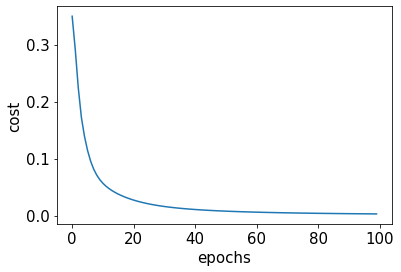

In [360]:
layers_dims = [10, 2]
NN = NeuralNetwork(layers_dims)
start_time = time.time()
NN.fit(X_train, Y_train, learning_rate=0.5, n_iterations=1000)
print("%s секунд" % (time.time() - start_time))
print("Train Accuracy:", NN.predict(X_train, Y_train))
print("Test Accuracy:", NN.predict(X_test, Y_test))
NN.plot_cost()

In [361]:
res = NN.result_mk(X_test)
print(res)
y_result = []

for i in range(res.shape[1]):
    y = []
    for j in range(res.shape[0]):
        if res[j][i] >= 0.5:
            y.append(1)
        else:
            y.append(0) 
    y_result.append(y)
y_result = np.array(y_result)
print(y_result)

[[7.29264200e-03 3.20023844e-04 1.12220228e-03 ... 9.99846339e-01
  9.99278686e-01 1.92194733e-03]
 [9.92707358e-01 9.99679976e-01 9.98877798e-01 ... 1.53661074e-04
  7.21313635e-04 9.98078053e-01]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [362]:

def convert_back(array):
    converted = []
    for x in array:
        for i in range(len(x)):
            if x[i] >= 0.5:
                converted.append(i)
                break
    return converted

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[1 1 1 ... 0 0 1]
Confusion matrix, without normalization
[[ 985    0]
 [   0 1046]]


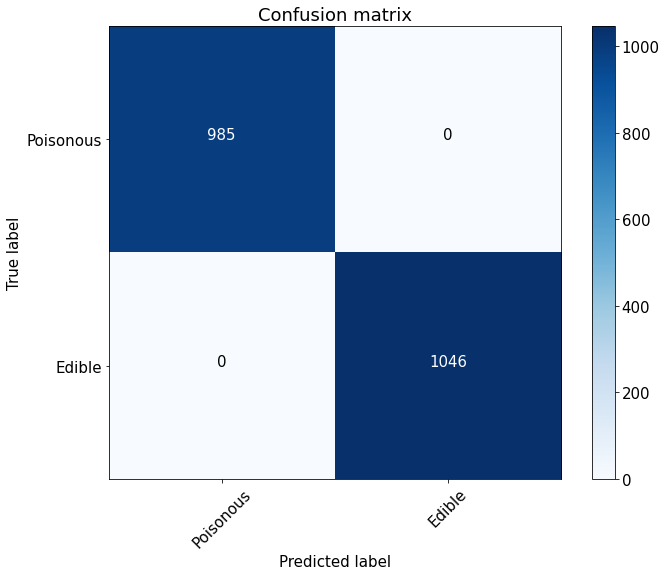

In [363]:
from sklearn.metrics import confusion_matrix
import itertools
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)
print(Y_test)
print(np.array(convert_back(y_result)))
cnf_matrix = confusion_matrix(np.array(convert_back(Y_test)), np.array(convert_back(y_result)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Poisonous', 'Edible'],
                      title='Confusion matrix')
plt.savefig("conf_mush.png")
plt.show()

In [364]:
from sklearn.metrics import classification_report 
report = classification_report(Y_test, y_result, target_names=['Poisonous', 'Edible'])
print(report)

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00       985
      Edible       1.00      1.00      1.00      1046

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031
 samples avg       1.00      1.00      1.00      2031



Теперь используем нейронную сеть, в которой функцией активации в скрытых слоях является ReLU

Cost:  0.3351388077466717 Train Accuracy: 77.36747086820942
Cost:  0.011131989691030535 Train Accuracy: 99.75381585425899
Cost:  0.005160608842730109 Train Accuracy: 99.91793861808634
Cost:  0.004088327304227723 Train Accuracy: 99.93435089446906
Cost:  0.0025904299402598682 Train Accuracy: 99.98358772361726
Cost:  0.00180951784136608 Train Accuracy: 100.0
Cost:  0.0015164496418955432 Train Accuracy: 100.0
Cost:  0.0013683796908964827 Train Accuracy: 100.0
Cost:  0.001282480049527745 Train Accuracy: 100.0
Cost:  0.0012251276717911632 Train Accuracy: 100.0
12.5448579788208 секунд
Train Accuracy: 100.0
Test Accuracy: 100.0


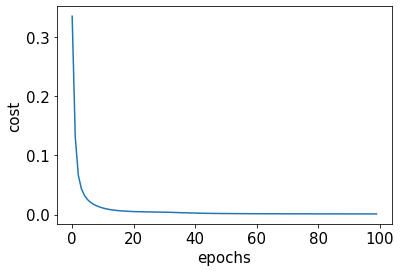

In [365]:
layers_dims = [10, 2]
NN1 = NeuralNetwork1(layers_dims)
start_time = time.time()
NN1.fit(X_train, Y_train, learning_rate=0.5, n_iterations=1000)
print("%s секунд" % (time.time() - start_time))
print("Train Accuracy:", NN1.predict(X_train, Y_train))
print("Test Accuracy:", NN1.predict(X_test, Y_test))
NN1.plot_cost()

In [366]:
res1 = NN1.result_mk(X_test)
y1_result = []

for i in range(res1.shape[1]):
    y = []
    for j in range(res1.shape[0]):
        if res[j][i] >= 0.5:
            y.append(1)
        else:
            y.append(0) 
    y1_result.append(y)
y1_result = np.array(y1_result)

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[1 1 1 ... 0 0 1]
Confusion matrix, without normalization
[[ 985    0]
 [   0 1046]]


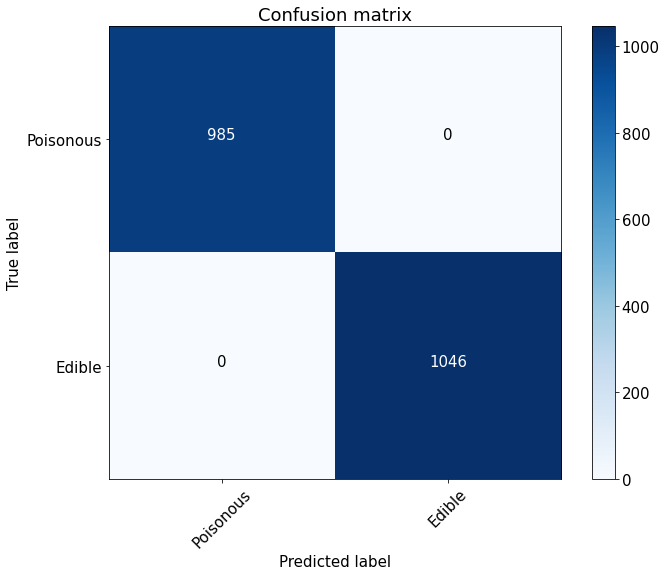

In [367]:
font = {'size' : 15}

plt.rc('font', **font)
print(Y_test)
print(np.array(convert_back(y1_result)))
cnf_matrix = confusion_matrix(np.array(convert_back(Y_test)), np.array(convert_back(y1_result)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Poisonous', 'Edible'],
                      title='Confusion matrix')
plt.savefig("conf_mush.png")
plt.show()